In [1]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

 pandas 经常和其他工具一同使用，如数值计算工具：numpy和scjpy; 分析库 statsmodels 和 scikit-learn; 数据可视化库 matplotlib。在In[2] 中已导入本次数据分析所需的包。

In [2]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')
fec.info()

C:\Users\JM005172\AppData\Local\Programs\Anaconda18.12\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [3]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


（1）分析数据中赞助者的职业和雇主信息；
（2）分析赞助金额信息
（3）分析赞助者所在州信息

# 首先Wes MxKinney想到候选人所属党派是一个重要的信息，所以将13位候选人所在党派信息加上。

In [4]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [5]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [6]:
fec.cand_nm.map(parties)

0          Republican
1          Republican
2          Republican
3          Republican
4          Republican
5          Republican
6          Republican
7          Republican
8          Republican
9          Republican
              ...    
1001721    Republican
1001722    Republican
1001723    Republican
1001724    Republican
1001725    Republican
1001726    Republican
1001727    Republican
1001728    Republican
1001729    Republican
1001730    Republican
Name: cand_nm, Length: 1001731, dtype: object

In [7]:
fec['party'] = fec.cand_nm.map(parties)

In [8]:
fec[fec.cand_nm=='Obama, Barack']

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
107640,C00431445,P80003338,"Obama, Barack","BARNARD, ERIC",ANDREWS AFB,AA,20762,U.S. AIR FORCE,MILITARY POLICE,100.0,30-SEP-11,NaN,NaN,NaN,SA17A,756218,Democrat
107641,C00431445,P80003338,"Obama, Barack","HESTER, COREEN",LONDON NW8 9-NB,AA,NaN,THE AMERICAN SCHOOL IN LONDON,EDUCATOR,500.0,30-DEC-11,NaN,NaN,NaN,SA17A,772372,Democrat
107642,C00431445,P80003338,"Obama, Barack","ST. HILAIRE, PIERRE",APO,AA,09777,US DEPARTMENT OF JUSTICE,ATTORNEY,300.0,30-SEP-11,NaN,NaN,NaN,SA17A,756218,Democrat
107643,C00431445,P80003338,"Obama, Barack","BRIDGEWATER, PAMELA",DPO,AA,340080001,DEPT. OF STATE,DIPLOMAT,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,756218,Democrat
107644,C00431445,P80003338,"Obama, Barack","HILL, HARRY A",AICHI-GUN,AA,NaN,NaN,NaN,-2300.0,30-JUN-11,Refund,NaN,NaN,SB28A,756214,Democrat
107645,C00431445,P80003338,"Obama, Barack","SMITH, HOLLY L",LONDON SW5 0JP,AA,NaN,NaN,NaN,-2300.0,29-JUN-11,Refund,NaN,NaN,SB28A,756214,Democrat
107646,C00431445,P80003338,"Obama, Barack","WINFIELD, MARTHA BERKMAN",LONDON W2 5DH,AA,NaN,NaN,NaN,-2300.0,30-JUN-11,Refund,NaN,NaN,SB28A,756214,Democrat
107647,C00431445,P80003338,"Obama, Barack","BARNARD, ERIC",ANDREWS AFB,AA,20762,U.S. AIR FORCE,MILITARY POLICE,50.0,30-SEP-11,NaN,NaN,NaN,SA17A,756218,Democrat
107648,C00431445,P80003338,"Obama, Barack","ROBINSON, TODD",DPO,AA,340240005,U.S. DEPARTMENT OF STATE,DIPLOMAT,250.0,05-APR-11,NaN,NaN,NaN,SA17A,756214,Democrat
107649,C00431445,P80003338,"Obama, Barack","ROBINSON, TODD",DPO,AA,340240005,U.S. DEPARTMENT OF STATE,DIPLOMAT,1000.0,30-JUN-11,NaN,NaN,NaN,SA17A,756214,Democrat


In [9]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

综上两个shell中Democrat 党派和 bama, Barack 的总数是相等的。

# 其次,赞助者撤回金额被视为无效数据（fec.contb_receipt_amt<=0的数据无效）。

In [12]:
fec = fec[fec.contb_receipt_amt > 0]
fec.contb_receipt_amt .value_counts()

100.00     178188
50.00      137584
25.00      110345
250.00      91182
500.00      57984
2500.00     49005
35.00       37237
1000.00     36494
10.00       33986
200.00      27813
            ...  
9.25            1
202.66          1
1205.00         1
80.73           1
115.07          1
213.69          1
70.76           1
144.13          1
97.15           1
132.12          1
Name: contb_receipt_amt, Length: 7326, dtype: int64

# （1）分析数据中赞助者的职业和雇主信息(fec.contbr_occupation() 数据)；

In [14]:
fec.contbr_occupation.value_counts()

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
                                           ...  
CHIEF FINAICIAL OFFICER                        1
CASINO MANAGER                                 1
EXECUTIVE VP OPERATIONS                        1
HYDROLOGIST/GEOLOGIST                          1
MORGAGE BANKER                                 1
TECHNICAL PM                                   1
PHYSICIAN SURGEON CEO                          1
LICENSING MANAGER                              1
OPERATIONS & MARKETING                         1
ELECRONICS ENGINEER 

In [33]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO',
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [34]:
fec.contbr_occupation.value_counts()

RETIRED                    233990
NOT PROVIDED                57151
ATTORNEY                    34286
HOMEMAKER                   29931
PHYSICIAN                   23432
ENGINEER                    14334
TEACHER                     13990
CONSULTANT                  13273
PROFESSOR                   12555
NOT EMPLOYED                 9828
                            ...  
CHIEF FINAICIAL OFFICER         1
CASINO MANAGER                  1
EXECUTIVE VP OPERATIONS         1
HYDROLOGIST/GEOLOGIST           1
MORGAGE BANKER                  1
TECHNICAL PM                    1
PHYSICIAN SURGEON CEO           1
LICENSING MANAGER               1
OPERATIONS & MARKETING          1
ELECRONICS ENGINEER             1
Name: contbr_occupation, Length: 45062, dtype: int64

In [35]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,NOT PROVIDED,NOT PROVIDED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [36]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


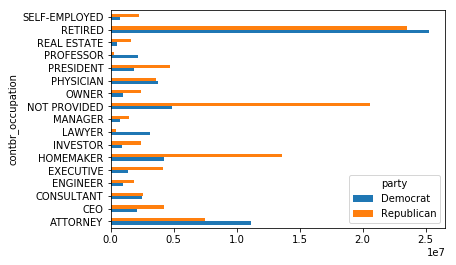

In [38]:
over_2mm.plot(kind='barh')

In [39]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [41]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [42]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694358.85
               SELF-EMPLOYED         18626807.16
               NOT EMPLOYED           8586308.70
               NOT PROVIDED           5053480.37
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          12059527.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      